In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import fileio
import numpy as np
import seaborn as sns
import keys
import matplotlib.pyplot as plt
import pandas as pd
from utils import number_countplot, play_from_label
from IPython import display

In [4]:
DATA_DIR = './data/working'

labels = pd.read_pickle("{}/labels.pkl".format(DATA_DIR))

with np.load("{}/splits.npz".format(DATA_DIR)) as splits:
    train_idx = splits['train_idx']
    test_idx = splits['test_idx']

X = np.load("{}/X_cqt.npz".format(DATA_DIR))['X']
X_train = X[train_idx, :]
X_test = X[test_idx, :]

Y = np.load("{}/Y.npz".format(DATA_DIR))['Y']
Y_train = Y[train_idx, :]
Y_test = Y[test_idx, :]

with np.load("{}/data_aug.npz".format(DATA_DIR)) as data:
    X_aug = data['X']
    Y_aug = data['Y']
X_train = np.vstack([X_train, X_aug])
Y_train = np.vstack([Y_train, Y_aug])

In [5]:
X.shape

(16910, 144, 151)

In [6]:
Y.shape

(16910, 24)

In [7]:
labels.shape

(16910, 11)

In [8]:
y_keys = np.argmax(Y, axis=1)

In [9]:
y_keys.shape

(16910,)

In [10]:
labels_aug = pd.DataFrame(np.argmax(Y_aug, axis=1), columns=['key'])

In [11]:
labels_aug['raw'] = 0.0
labels_aug['dataset'] = 'augmented'

In [12]:
y_labels = pd.concat([labels.iloc[train_idx], labels_aug], axis=0, sort=False)

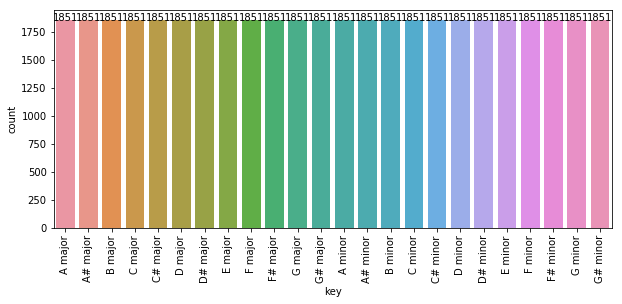

In [13]:
plt.figure(figsize=(10,4))
g = sns.countplot(y_labels['key'])
number_countplot()
plt.xticks(range(24), [keys.get_string_from_idx(ii).replace('\t', ' ') for ii in range(24)], rotation=90)
plt.show()

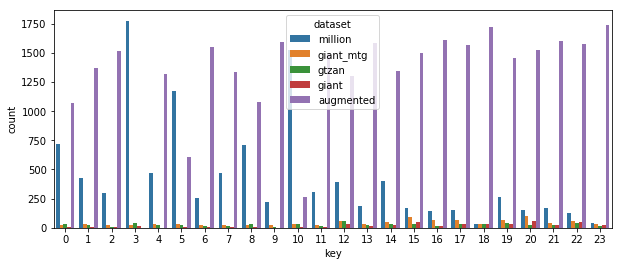

In [14]:
plt.figure(figsize=(10,4))
g = sns.countplot('key', hue='dataset', data=y_labels)

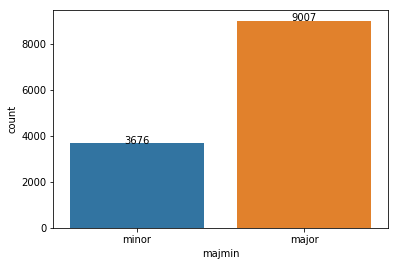

In [15]:
g = sns.countplot(y_labels['majmin'])
number_countplot()
plt.show()

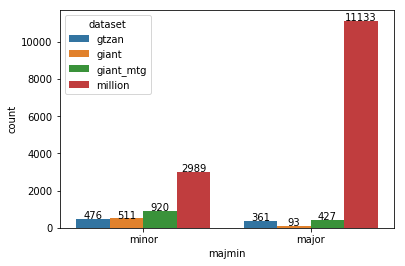

In [17]:
g = sns.countplot('majmin', hue='dataset', data=labels)
number_countplot()
plt.show()

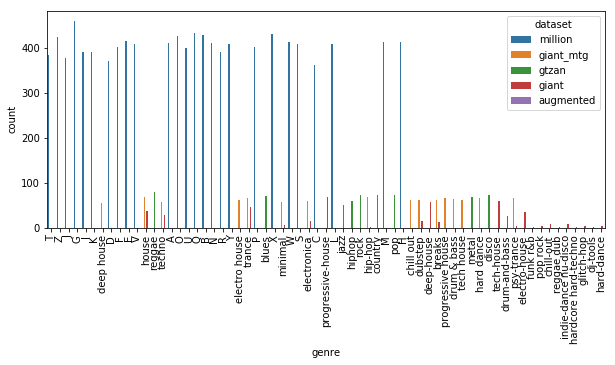

In [18]:
plt.figure(figsize=(10,4))
sns.countplot('genre', hue='dataset', data=y_labels)
plt.xticks(rotation=90)
plt.show()

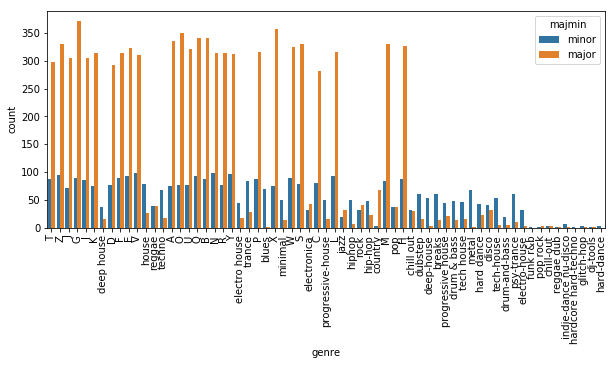

In [19]:
plt.figure(figsize=(10,4))
g = sns.countplot('genre', hue='majmin', data=y_labels)
plt.xticks(rotation=90)
plt.show()

## Play shit!

In [22]:
idx = np.random.choice(X.shape[1])
print(idx)
display.display(y_labels.iloc[idx])
play_from_label(y_labels.iloc[idx])

5


chunk_idx                                                    42
chunk_nr                                                    153
filepath      data/raw/lmd_matched_mp3/K/C/Y/TRKCYCZ128F92FB...
genre                                                         K
key                                                           4
key_shift                                                     0
key_str                                                C# major
raw                                                           1
time_shift                                                    1
majmin                                                    major
dataset                                                 million
Name: 8258, dtype: object